In [119]:
import sklearn.preprocessing as pre
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline


In [120]:
df = pd.read_csv('Stores.csv')
df.describe()
df.drop('Store ID ', axis=1, inplace=True)


array([[<AxesSubplot:title={'center':'Store_Area'}>,
        <AxesSubplot:title={'center':'Items_Available'}>],
       [<AxesSubplot:title={'center':'Daily_Customer_Count'}>,
        <AxesSubplot:title={'center':'Store_Sales'}>]], dtype=object)

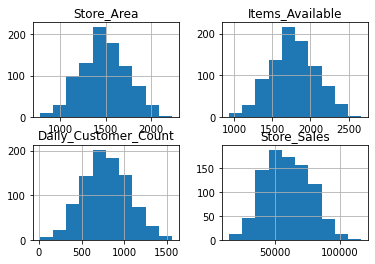

In [121]:
df.hist()


In [122]:
df.corr()


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


In [123]:
x_columns = 'Store_Area'
y_column = 'Items_Available'


In [124]:
minmax = pre.MinMaxScaler()
minmax.fit(df[[x_columns]])
df[x_columns] = minmax.transform(df[[x_columns]])
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,0.607978,1961,530,66490
1,0.471802,1752,210,39820
2,0.388583,1609,720,54010
3,0.464924,1748,620,53730
4,0.684319,2111,450,46620
...,...,...,...,...
891,0.555021,1910,1080,66390
892,0.420908,1663,850,82080
893,0.292297,1436,1060,76440
894,0.360385,1560,770,96610


In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    df[x_columns], df[y_column])
X_train = np.c_[X_train]
X_test = np.c_[X_test]
y_train = np.c_[y_train]
y_test = np.c_[y_test]

In [139]:
model = KNeighborsRegressor(7)
model.fit(X=X_train, y=y_train)
y_predict = model.predict(X_test)


In [140]:

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(mse, mae)
model.score(X_test, y_test)


305.7975583090382 12.940051020408166


0.9965040826507411